<a href="https://colab.research.google.com/github/IbrahemAmar/Data-mining-and-Machine-Learning-/blob/main/lab5_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#import libraries
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["LOKY_MAX_CPU_COUNT"] = "1"
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples
#import datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [99]:
#plot the data with colored labels and centroids
def plotData(data, names,labels,col1,col2, labelsType, centroids = np.empty([0,0])):
    #plot the titles
    plt.title(labelsType +  " labels")
    plt.xlabel(names[col1])
    plt.ylabel(names[col2])
    # plot the data with different color for every label and size of 50 pixels
    myPlot =plt.scatter(data[:,col1],data[:,col2],c = labels, s=50)
    nLabels =len(set(labels))
    # plot the centroids if exists in blue and with X marker
    plt.legend(handles=myPlot.legend_elements()[0], labels=range(1,nLabels+1))
    if (centroids.any()):
        plt.scatter(centroids[:,col1], centroids[:,col2], c='blue', marker = "x", s=80)
    plt.show(myPlot)

In [100]:
# plot the samples labels
def plotLabels(labels,labelsType):
    xmax=len(labels)
    plt.title("The Iris Dataset " + labelsType + " labels")
    plt.xlabel("Iris sample number")
    plt.ylabel("label")
    plt.bar(range(xmax),labels)
    plt.show()

In [101]:
# for every label compute the average of every data colomn
def vecCentroids(data,labels):
    # number of different labels
    nLabels=len(set(labels))
    # number of data features - colmons
    nCols = data.shape[1]
    inLabels = labels-1
    # compute sum and count of every colomn for every label
    sum = np.zeros((nLabels,nCols))
    count = np.zeros((nLabels,nCols))
    for i,elem in enumerate(data):
        sum[inLabels[i]]+=elem
        count[inLabels[i]]+=1
    return(sum/count)

In [102]:
# Plot the siluette of the samples and the average siluette value
def plotSilluette(silhouetteValues):
    plt.title("The silhouette test plot")
    plt.ylabel("The silhouette values")
    plt.xlabel("The sample#")
    plt.plot(silhouetteValues)
    plt.axis([0,len(silhouetteValues),-1,1])
    plt.hlines(np.average(silhouetteValues), 0, len(silhouetteValues),
               colors='black', linestyles="--")
    plt.hlines(0, 0, len(silhouetteValues), colors='red', linestyles="--")
    plt.show()

In [103]:
# rearange predicted labels
# according to the most common true label
def rearangeLabels(trueLabels,predLabels,k):
    rearangedLabels = np.zeros_like(trueLabels)
    for i in range(k):
        predIs = np.where((i+1)==predLabels)[0]
        # Get the true labels in the predicted locations
        trueLabelsInLoc = trueLabels[predIs]
        # find the common label
        commonLabel,count = mode(trueLabelsInLoc)
        # put the comon true label in the predicted location
        rearangedLabels[predIs] = commonLabel
    return rearangedLabels

In [104]:
Iris = datasets.load_iris()
data = Iris.data
names = Iris.feature_names
trueLabels = Iris.target+1 # true labeling

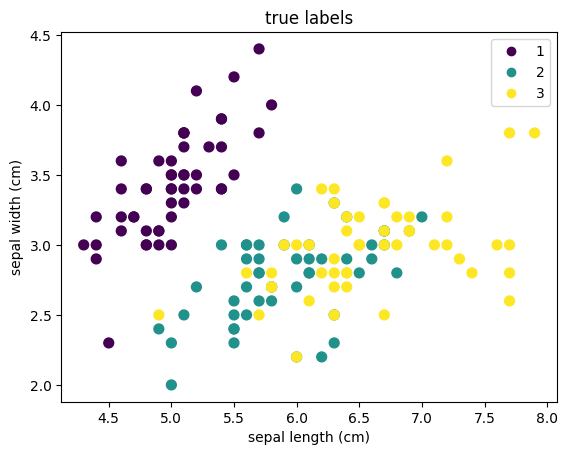

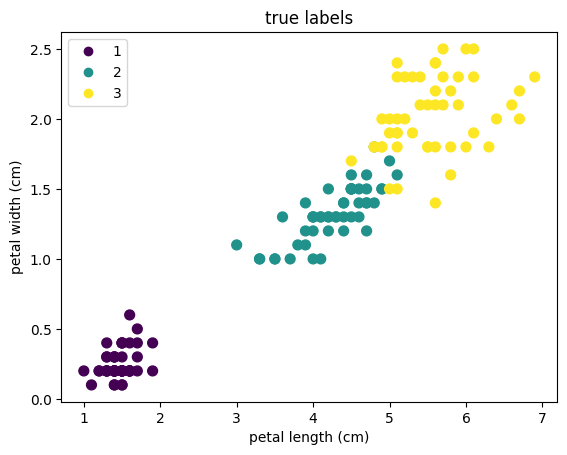

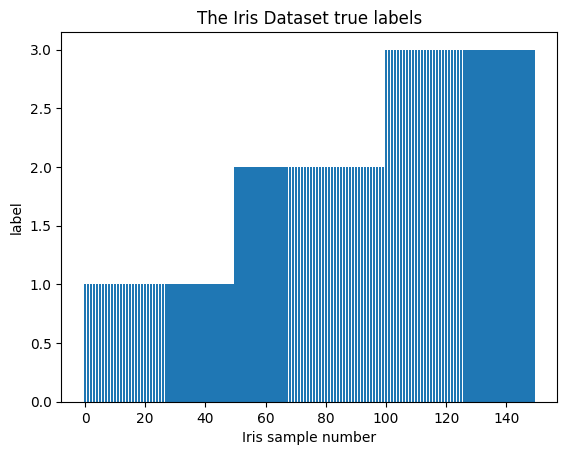

In [105]:
plotData(data, names,trueLabels,0,1,"true")
plotData(data, names,trueLabels,2,3,"true")
plotLabels(trueLabels,"true")

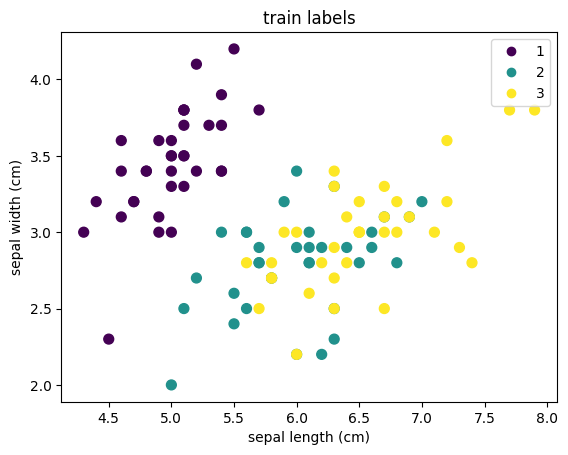

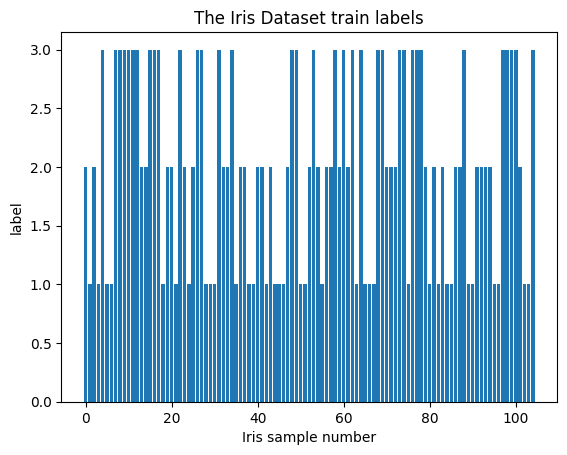

In [106]:
#split data to test and train sets
trainData, testData, trainLabels, testLabels = train_test_split(
    data, trueLabels, test_size = 0.30, random_state = 5, stratify=trueLabels)
plotData(trainData, names,trainLabels,0,1,"train")
plotLabels(trainLabels,"train")

In [107]:
# Run k-means
k=3
kmeans = KMeans(n_clusters = k).fit(trainData)
predLabels = kmeans.predict(testData)+1
predCentroids = kmeans.cluster_centers_
testCentroids = vecCentroids(testData,testLabels)
predictedLabels = rearangeLabels(testLabels,predLabels,k)

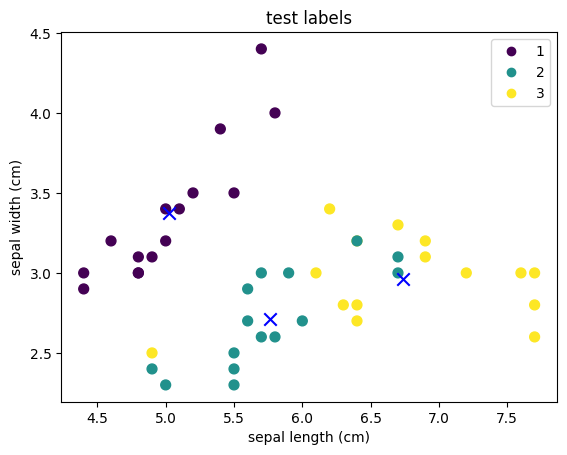

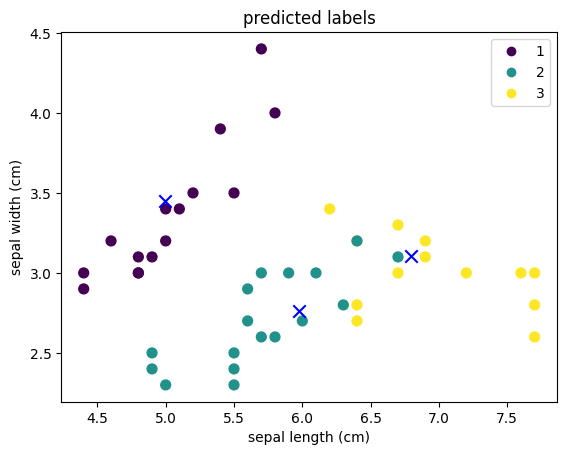

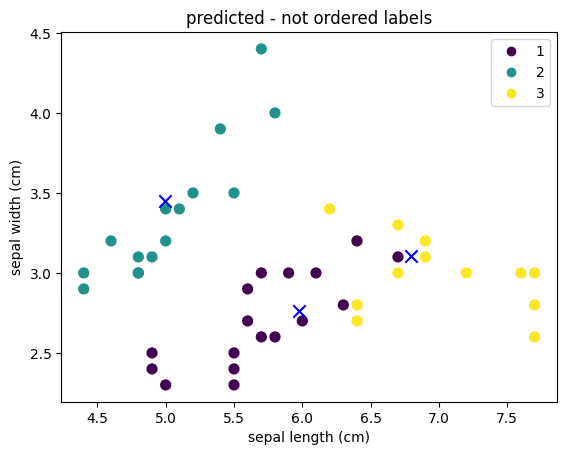

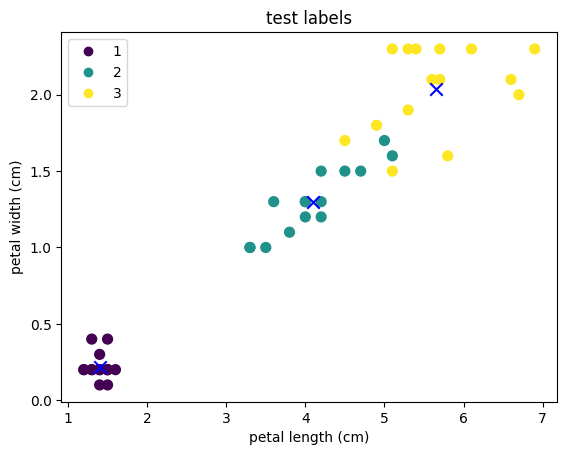

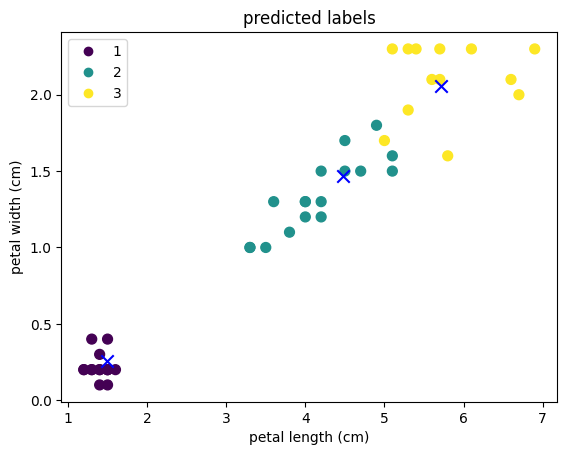

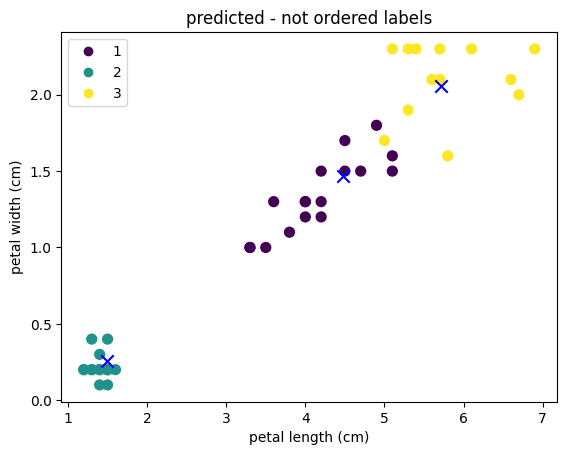

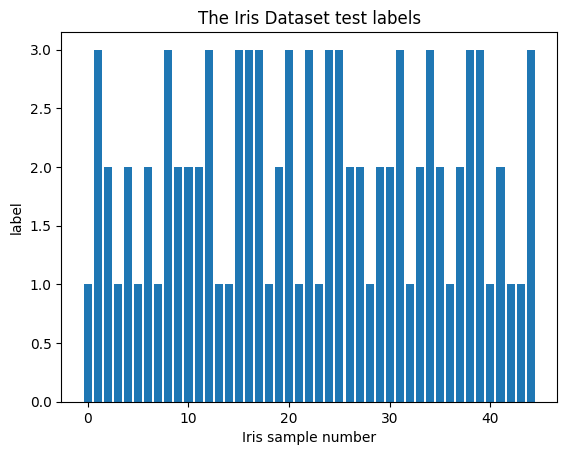

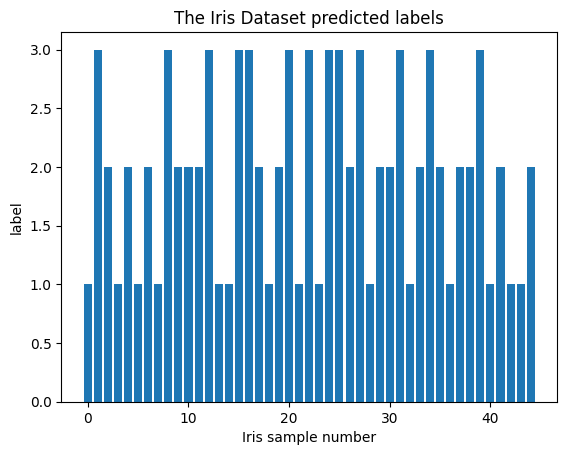

In [108]:
# Plot the predicted results
plotData(testData, names,testLabels,0,1,"test",testCentroids)
plotData(testData, names,predictedLabels,0,1,"predicted",predCentroids)
plotData(testData, names,predLabels,0,1,"predicted - not ordered",predCentroids)

plotData(testData, names,testLabels,2,3,"test",testCentroids)
plotData(testData, names,predictedLabels,2,3,"predicted",predCentroids)
plotData(testData, names,predLabels,2,3,"predicted - not ordered",predCentroids)
plotLabels(testLabels,"test")
plotLabels(predictedLabels,"predicted")

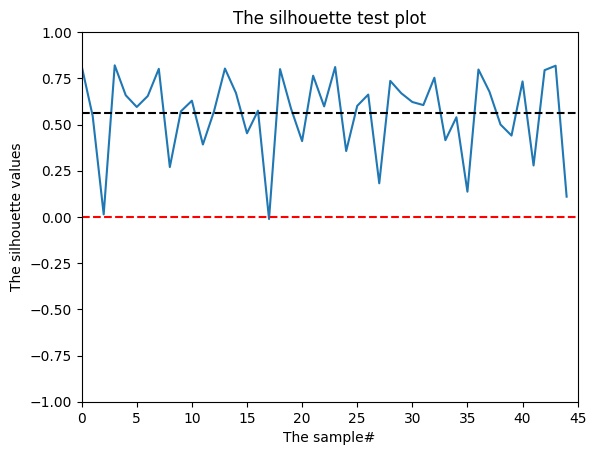

In [109]:
#plot the silhouette values

silhouetteValues = silhouette_samples(testData, predictedLabels)
plotSilluette(silhouetteValues)

In [110]:
print("For clusters =", k,
      "The average silhouette_score is: %.2f"  %np.average(silhouetteValues))

For clusters = 3 The average silhouette_score is: 0.56


In [111]:
confusionMat = confusion_matrix(testLabels, predictedLabels)
print(confusionMat)

[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


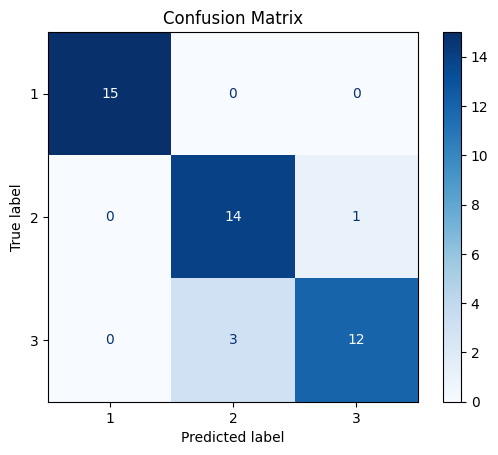

In [112]:
# Plot the matrix
disp = ConfusionMatrixDisplay(confusionMat, display_labels=range(1,k+1))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [113]:
total = 0
correct = 0

for i in range(len(confusionMat)):
    for j in range(len(confusionMat[i])):
        total += confusionMat[i][j]
        if i == j:
            correct += confusionMat[i][j]

errors = total - correct
error_percentage = errors / total * 100

print("Total samples:", total)
print("Correct predictions:", correct)
print("Error percentage:", round(error_percentage, 2), "%")

Total samples: 45
Correct predictions: 41
Error percentage: 8.89 %


In [114]:
best_class = None
best_error = 75

for i, row in enumerate(confusionMat, start=1):
    total = sum(row)
    correct = row[i-1]          # diagonal element
    error = (total - correct) / total * 100
    print(f"Class {i}: error = {error:.2f}%")
    if error < best_error:
        best_error = error
        best_class = i

print("Best predicted class:", best_class)

Class 1: error = 0.00%
Class 2: error = 6.67%
Class 3: error = 20.00%
Best predicted class: 1
